In [1]:
import scanpy as sc
import pandas as pd

In [2]:
adata_C = sc.read_h5ad('/node200data/18parkky/datasets/data/public/processed_data/Immunotherapy_CRC_Chen_et_al/2_cell_type_labeled_h5ad/Chen.MSI.preprocessed.NanoMnT.ManualAnnot.MSI_score_labeled.lvl3.h5ad')
adata_J = sc.read_h5ad('/node200data/18parkky/datasets/data/public/processed_data/Joanito_et_al/2_cell_type_labeled_h5ad/Joanito.MSI.preprocessed.NanoMnT.ManualAnnot.MSI_score_labeled.lvl3.h5ad')

In [6]:
iCMS3_marker = pd.read_csv('/node200data/18parkky/datasets/reference/marker_genes/colon/iCMS_marker/iCMS_marker_genes.csv')
iCMS3_marker = list(iCMS3_marker['iCMS3_Up'].dropna())

In [3]:
adata_C = adata_C.raw.to_adata()
sc.pp.normalize_total(adata_C)
sc.pp.log1p(adata_C)

In [4]:
adata_J = adata_J.raw.to_adata()
sc.pp.normalize_total(adata_J)
sc.pp.log1p(adata_J)

In [5]:
adata_C.obs['isTumor'] = [ str(bool(MCT2=='Tumor epithelial')) for MCT2 in adata_C.obs['Manual_CellType_lvl_2'] ]
adata_J.obs['isTumor'] = [ str(bool(MCT2=='Tumor epithelial')) for MCT2 in adata_J.obs['Manual_CellType_lvl_2'] ]

In [30]:
sc.tl.rank_genes_groups(adata_J, groupby='isTumor', method='logreg')

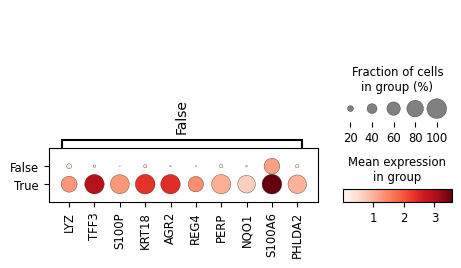

In [31]:
sc.pl.rank_genes_groups_dotplot(adata_J, groupby='isTumor', n_genes=10)

In [42]:
joanito_nanomnt = pd.read_csv('/node200data/18parkky/datasets/data/public/processed_data/Joanito_et_al/NanoMnT.AlleleTable.gene_labeled.tsv.gz', sep='\t')


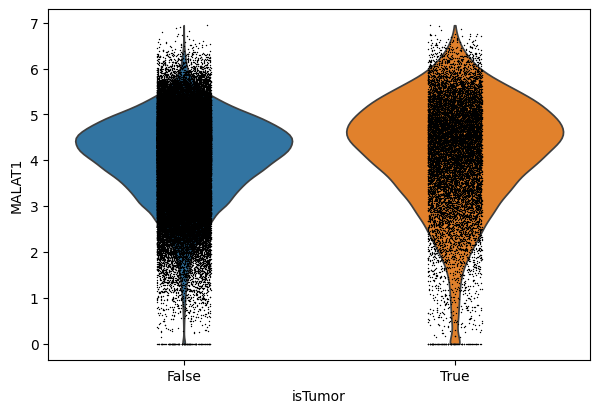

In [6]:
sc.pl.violin(adata_C, keys='MALAT1', groupby='isTumor')

In [48]:
joanito_nanomnt[joanito_nanomnt['gene']=='LYZ']

,read_name,locus,repeat_unit,allele,reference_STR_allele,left_flanking_seq,right_flanking_seq,flag,CB,UMI,...,read_STR_allele,SampleID,flanking_quality,diff,Identifier,chrom,start,end,gene,n_gene
